In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def buildBN_afterInput(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZES = [2, 16, 32, 128, 256] 
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH_SIZE in BATCH_SIZES:
    model = buildBN_afterInput(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "BATCH_SIZE %s" %(BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

25000/25000 [==============================] - 104s 4ms/step - loss: 2.2525 - accuracy: 0.1474 - val_loss: 21.6765 - val_accuracy: 0.1756
Epoch 47/50
25000/25000 [==============================] - 102s 4ms/step - loss: 2.2519 - accuracy: 0.1511 - val_loss: 19.6923 - val_accuracy: 0.1972
Epoch 48/50
25000/25000 [==============================] - 101s 4ms/step - loss: 2.2501 - accuracy: 0.1505 - val_loss: 24.8313 - val_accuracy: 0.1891
Epoch 49/50
25000/25000 [==============================] - 105s 4ms/step - loss: 2.2510 - accuracy: 0.1470 - val_loss: 24.7007 - val_accuracy: 0.1911
Epoch 50/50
25000/25000 [==============================] - 113s 5ms/step - loss: 2.2518 - accuracy: 0.1487 - val_loss: 69.1752 - val_accuracy: 0.1660
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
__________________________________________

3125/3125 [==============================] - 24s 8ms/step - loss: 0.5732 - accuracy: 0.7972 - val_loss: 1.6034 - val_accuracy: 0.5487
Epoch 43/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.5628 - accuracy: 0.8019 - val_loss: 1.6421 - val_accuracy: 0.5441
Epoch 44/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.5506 - accuracy: 0.8057 - val_loss: 1.6133 - val_accuracy: 0.5573
Epoch 45/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.5483 - accuracy: 0.8073 - val_loss: 1.6394 - val_accuracy: 0.5502
Epoch 46/50
3125/3125 [==============================] - 25s 8ms/step - loss: 0.5315 - accuracy: 0.8133 - val_loss: 1.6805 - val_accuracy: 0.5411
Epoch 47/50
3125/3125 [==============================] - 25s 8ms/step - loss: 0.5323 - accuracy: 0.8135 - val_loss: 1.6584 - val_accuracy: 0.5418
Epoch 48/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.5166 - accuracy: 0.8173 - val_loss: 1.7037 - val_accurac

1563/1563 [==============================] - 15s 10ms/step - loss: 0.3479 - accuracy: 0.8773 - val_loss: 1.9469 - val_accuracy: 0.5369
Epoch 39/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3378 - accuracy: 0.8809 - val_loss: 1.9802 - val_accuracy: 0.5401
Epoch 40/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3312 - accuracy: 0.8837 - val_loss: 1.9995 - val_accuracy: 0.5432
Epoch 41/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3310 - accuracy: 0.8837 - val_loss: 2.0273 - val_accuracy: 0.5357
Epoch 42/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3123 - accuracy: 0.8893 - val_loss: 2.0279 - val_accuracy: 0.5411
Epoch 43/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3073 - accuracy: 0.8910 - val_loss: 2.0694 - val_accuracy: 0.5371
Epoch 44/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2937 - accuracy: 0.8970 - val_loss: 2.0744 - val_

Epoch 35/50
391/391 [==============================] - 7s 17ms/step - loss: 0.1214 - accuracy: 0.9626 - val_loss: 2.4125 - val_accuracy: 0.5090
Epoch 36/50
391/391 [==============================] - 7s 17ms/step - loss: 0.1161 - accuracy: 0.9647 - val_loss: 2.4066 - val_accuracy: 0.5171
Epoch 37/50
391/391 [==============================] - 7s 17ms/step - loss: 0.1066 - accuracy: 0.9678 - val_loss: 2.4729 - val_accuracy: 0.5138
Epoch 38/50
391/391 [==============================] - 7s 17ms/step - loss: 0.1014 - accuracy: 0.9697 - val_loss: 2.5147 - val_accuracy: 0.5139
Epoch 39/50
391/391 [==============================] - 7s 17ms/step - loss: 0.0984 - accuracy: 0.9712 - val_loss: 2.5646 - val_accuracy: 0.5078
Epoch 40/50
391/391 [==============================] - 7s 17ms/step - loss: 0.0898 - accuracy: 0.9728 - val_loss: 2.5075 - val_accuracy: 0.5191
Epoch 41/50
391/391 [==============================] - 7s 17ms/step - loss: 0.0939 - accuracy: 0.9710 - val_loss: 2.5925 - val_accuracy:

196/196 [==============================] - 5s 25ms/step - loss: 0.1119 - accuracy: 0.9768 - val_loss: 2.3048 - val_accuracy: 0.4985
Epoch 33/50
196/196 [==============================] - 5s 23ms/step - loss: 0.1059 - accuracy: 0.9778 - val_loss: 2.3710 - val_accuracy: 0.4943
Epoch 34/50
196/196 [==============================] - 5s 23ms/step - loss: 0.1007 - accuracy: 0.9785 - val_loss: 2.3843 - val_accuracy: 0.4996
Epoch 35/50
196/196 [==============================] - 5s 23ms/step - loss: 0.0899 - accuracy: 0.9814 - val_loss: 2.4209 - val_accuracy: 0.4929
Epoch 36/50
196/196 [==============================] - 5s 23ms/step - loss: 0.0787 - accuracy: 0.9851 - val_loss: 2.4254 - val_accuracy: 0.4962
Epoch 37/50
196/196 [==============================] - 5s 23ms/step - loss: 0.0743 - accuracy: 0.9861 - val_loss: 2.4533 - val_accuracy: 0.4935
Epoch 38/50
196/196 [==============================] - 5s 23ms/step - loss: 0.0771 - accuracy: 0.9842 - val_loss: 2.4629 - val_accuracy: 0.4976
Epoc

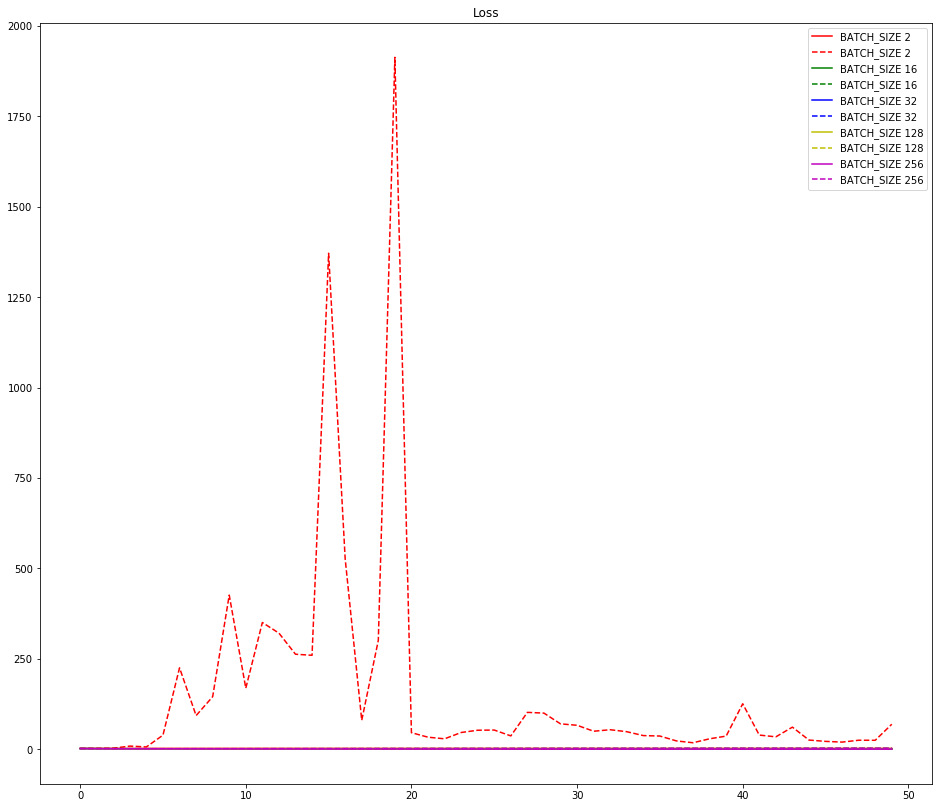

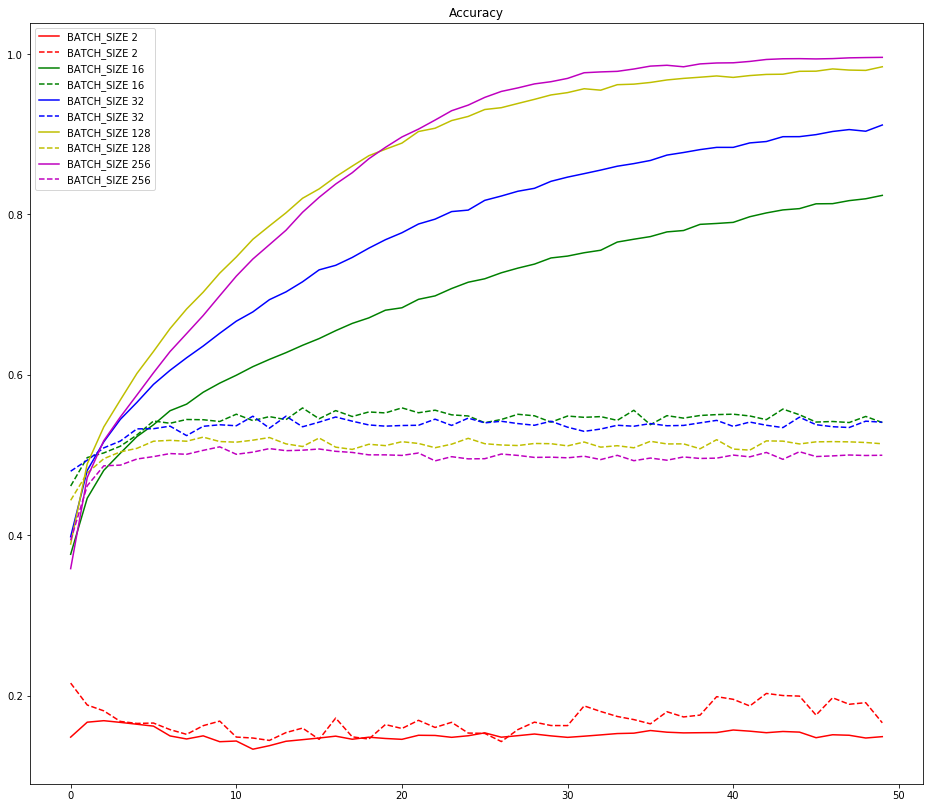

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()